##### Github Link :  https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-klbaligala94

#### Background:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Objective:

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In [1]:
%matplotlib inline
#Import Data Processing and Visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import dataset to Python
cc_ds = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
#Check on the dataset if imported properly
cc_ds.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Univariate Analysis

Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs.

In [4]:
#Dataset general information
cc_ds.info()
#Dataset dimension
cc_ds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


(660, 7)

In [5]:
#Number of unique levels per variable
cc_ds.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [6]:
#Statistical summary metrics for the numeric variables
cc_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


* There are no null values in every variable in the data.
* There are no unexpected values code in the variables.
* Dataset is composed of numeric variables except primary keys (SI_No/Customer Key).

#####  Outlier Detection, Univariate Variable Distribution Graphs

In [7]:
#Extract numeric columns from the dataset
columns = list(cc_ds.iloc[:,2:])
columns

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [8]:
#Extract percentiles of each variable
#This will help out identify outliers in the each variable
for column in columns:
    print(column) 
    np.percentile(cc_ds[column], [10,20,30,40,50,60,70,80,90,95,99,100])

Avg_Credit_Limit


array([  7000.,   9000.,  12000.,  15000.,  18000.,  26400.,  39000.,
        56000.,  71100., 121100., 180050., 200000.])

Total_Credit_Cards


array([ 2.,  3.,  4.,  4.,  5.,  5.,  6.,  7.,  7.,  8., 10., 10.])

Total_visits_bank


array([0., 1., 1., 2., 2., 3., 3., 4., 5., 5., 5., 5.])

Total_visits_online


array([ 0.  ,  0.  ,  1.  ,  2.  ,  2.  ,  2.  ,  3.  ,  4.  ,  5.  ,
        9.05, 15.  , 15.  ])

Total_calls_made


array([ 0.,  1.,  2.,  2.,  3.,  4.,  4.,  6.,  8.,  9., 10., 10.])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution')

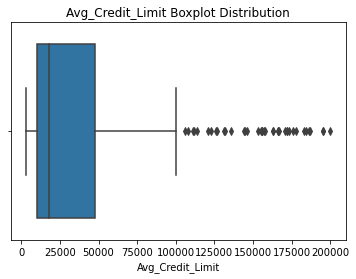

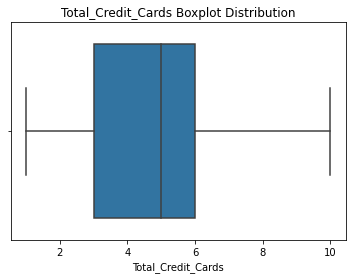

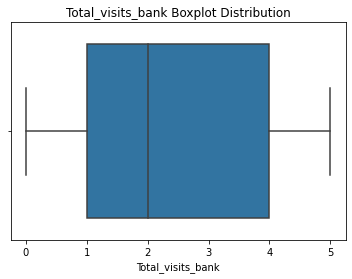

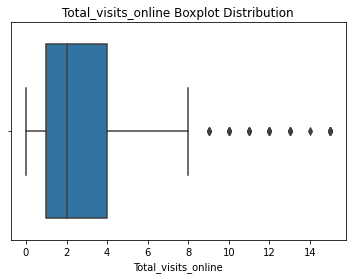

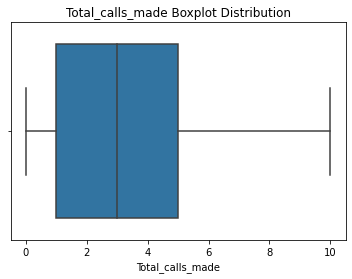

In [9]:
#Distribution and Outlier detection of all numeric variables in the dataset (Boxplot)
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds[column]).set_title(column + ' Boxplot Distribution')

* Percentile distributions show that most data are being capture by the 95th percentile value.
* Boxplots show us points that are considered outliers from Avg Credit Limit and Total Visit Online variables.

Instead of dropping the rows with outlier data points, we can cap them using percentile values or the observed IQR range value from the boxplots

In [10]:
#Based on the estimated values near 95th percentile and IQR range, we cap the variable to 100k (39 rows capped)
len(cc_ds[(cc_ds['Avg_Credit_Limit']>100000)])
cc_ds.loc[cc_ds.Avg_Credit_Limit > 100000, 'Avg_Credit_Limit'] = 100000

39

In [11]:
#Based on the estimated values near 95th percentile and IQR range, we cap the variable to 8(37 rows capped)
len(cc_ds[(cc_ds['Total_visits_online']>8)])
cc_ds.loc[cc_ds.Total_visits_online > 8, 'Total_visits_online'] = 8

37

##### Histogram and Countplot Distribution of Variables

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Overall Distribution')

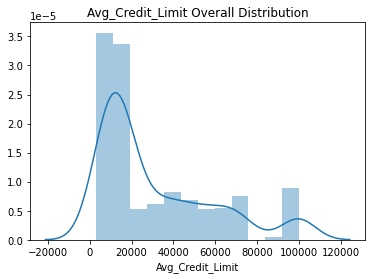

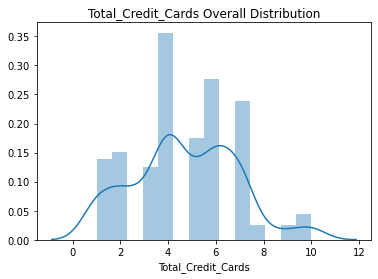

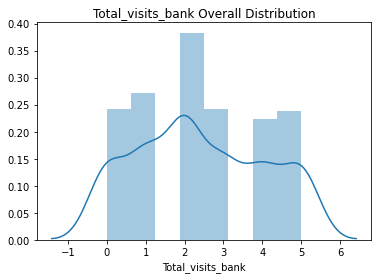

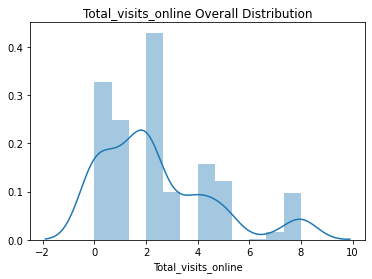

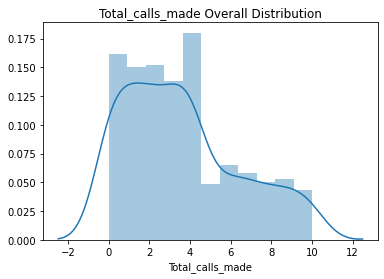

In [12]:
#Distribution of all numeric variables in the dataset (Histogram)
for column in columns:
    plt.figure()  
    sns.distplot(cc_ds[column]).set_title(column + ' Overall Distribution')

* Though we have applied histogram to all variables, it is mostly applicable to look into the distribution of the Avg Credit Limit which is showing a right skewed distribution
* We can also view that most of the other variables can be partition into 3 different clusters based on their noticeable peaks; Total_visits_bank is the most apparent followed by total_calls_made.
* Total_visits_online and Total_credit_cards can be divided into 4 clusters but also trim down to 3, if not too strict.

Text(0.5, 1.0, 'Total Credit Cards Frequency Distribution')

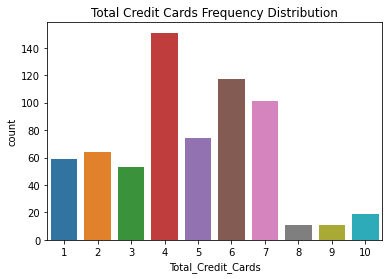

In [13]:
#By looking at the count plot, we can see that it is clearer we can partition this into 3 clusters based on the data pattern (1-3,4-7, 8-10)
sns.countplot(cc_ds['Total_Credit_Cards']).set_title('Total Credit Cards Frequency Distribution')

Text(0.5, 1.0, 'Total Bank Visits Frequency Distribution')

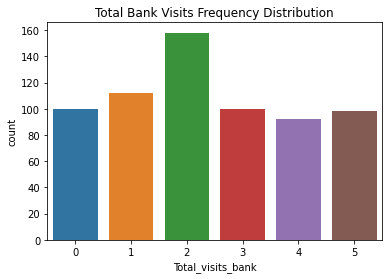

In [14]:
# 3 possible clusters in here as well by looking at the data pattern of  (low (0-1), med (2) , high(3-5))
sns.countplot(cc_ds['Total_visits_bank']).set_title('Total Bank Visits Frequency Distribution')

Text(0.5, 1.0, 'Total Online Visits Frequency Distribution')

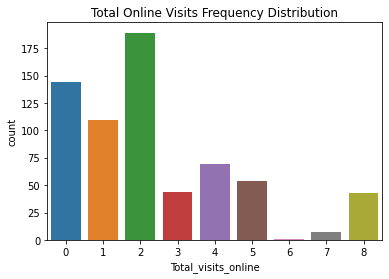

In [15]:
# 3 possible clusters in here as well by looking at the data pattern of  (low (0-1), med (2) , high(3-5))
sns.countplot(cc_ds['Total_visits_online']).set_title('Total Online Visits Frequency Distribution')

Text(0.5, 1.0, 'Total Calls Made Frequency Distribution')

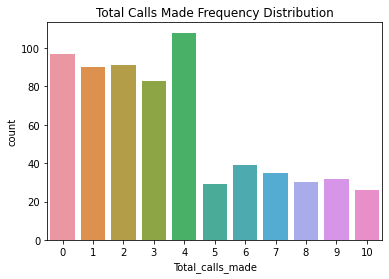

In [16]:
# 2 possible clusters by looking at pattern of data <=4 and > 4
sns.countplot(cc_ds['Total_calls_made']).set_title('Total Calls Made Frequency Distribution')

<Figure size 720x576 with 0 Axes>

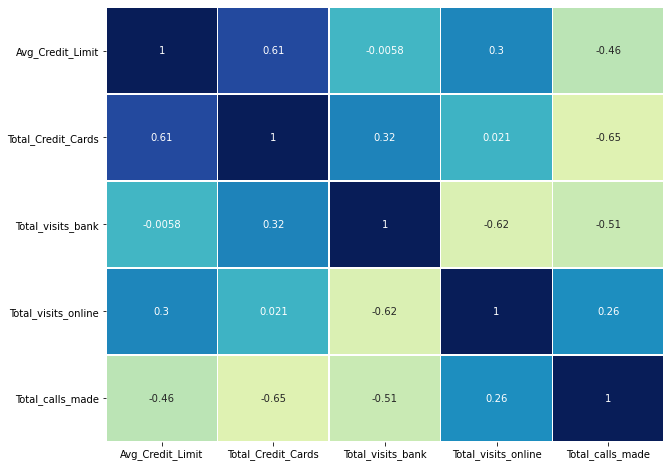

In [17]:
#Correlation Plot
#Removing the unneccessary variables
cc_ds_2 = cc_ds.iloc[:,2:]

plt.figure(figsize=(10,8))
sns.heatmap(cc_ds_2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

There is a slightly strong positive correlation (0.61) between avg credit limit and total credit cards. This suggests that as total number of credit cards increases, average credit limit also increases. However, we won't be deleting any of these variables since this is not a highly correlated case and we might be disregarding any useful information.

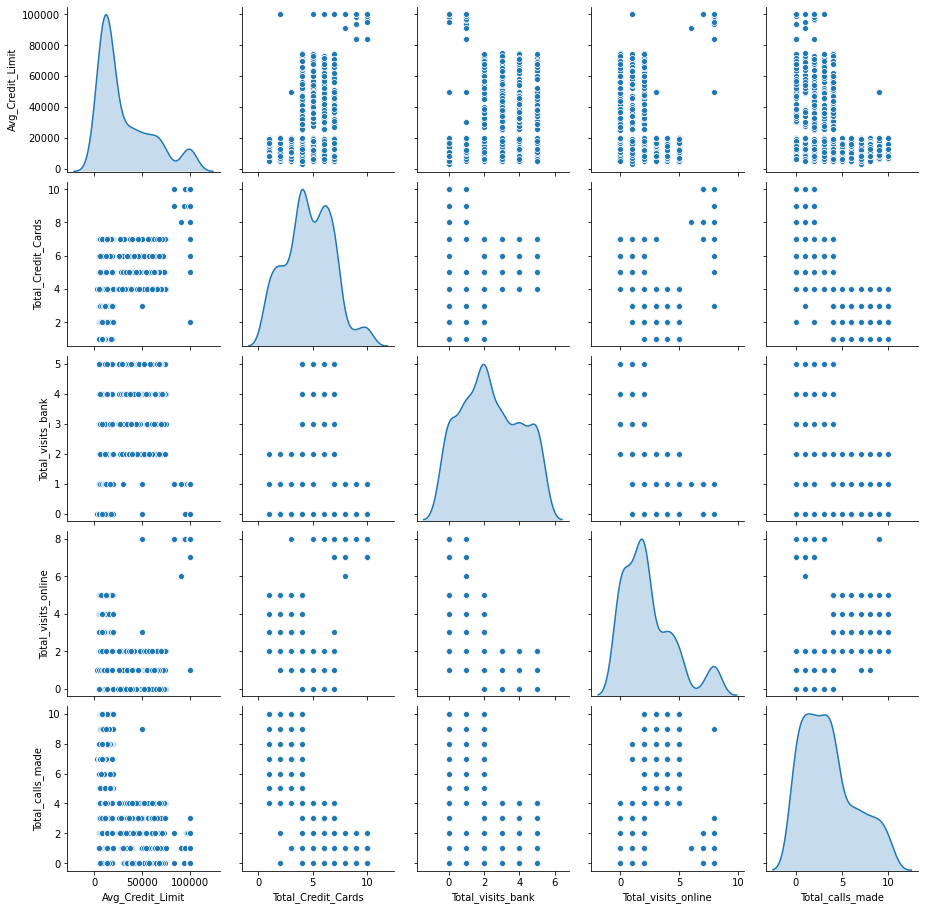

In [18]:
#Additional pairplots for all numeric variables
sns.pairplot(cc_ds_2,diag_kind='kde')

Looking at the distributions of the variables, these suggest that 3 possible initial clusters might be already enough to segment the data properly.

#### K-means Clustering

Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Remove outlier which was done on top and scale the data before subjecting to clustering as larger values from  variables can affect the assigning of overall clusters.


In [19]:
from scipy.stats import zscore
#Zscore to scale
cc_ds_z = cc_ds_2.apply(zscore)
cc_ds_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.474111,-1.249225,-0.860451,-0.627980,-1.251537
1,0.671579,-0.787585,-1.473731,2.581387,1.891859
2,0.671579,1.058973,-0.860451,0.288982,0.145528
3,-0.049433,0.135694,-0.860451,-0.627980,0.145528
4,2.474111,0.597334,-1.473731,2.581387,-0.203739


In [20]:
from sklearn.cluster import KMeans
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

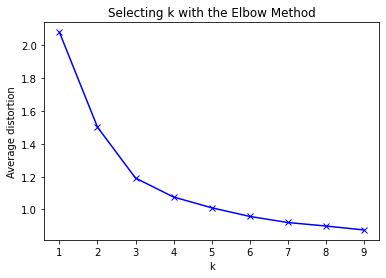

In [21]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cc_ds_z)
    prediction=model.predict(cc_ds_z)
    meanDistortions.append(sum(np.min(cdist(cc_ds_z, model.cluster_centers_, 'euclidean'), axis=1)) / cc_ds_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

By using the elbow method, picking cluster k =3 maximizes the variance explained.

In [22]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=123)
kmeans

KMeans(n_clusters=3, random_state=123)

In [23]:
kmeans.fit(cc_ds_z)
pred_kmeans = kmeans.fit_predict(cc_ds_z)

KMeans(n_clusters=3, random_state=123)

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.08692423,  0.37368962,  0.6663945 , -0.63629453, -0.55300488],
       [ 2.42940775,  1.86222621, -1.10576269,  2.49886068, -0.87432983],
       [-0.69206759, -1.05962278, -0.9015185 ,  0.53869043,  1.14810882]])

In [25]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(cc_ds_z) )
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          0.086924            0.373690           0.666395   
1          2.429408            1.862226          -1.105763   
2         -0.692068           -1.059623          -0.901518   

   Total_visits_online  Total_calls_made  
0            -0.636295         -0.553005  
1             2.498861         -0.874330  
2             0.538690          1.148109  


In [26]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [27]:
# Joining the label dataframe with the data frame.
df_labeled = cc_ds.join(df_labels)

In [28]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(10)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,8,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,8,3,1
5,6,58634,20000,3,0,1,8,2
6,7,48370,100000,5,0,8,2,1
7,8,37376,15000,3,0,1,1,2
8,9,82490,5000,2,0,2,2,2
9,10,44770,3000,4,0,1,7,2


In [29]:
#The frequency distribution of the clusters across dataset
df_labeled['labels'].value_counts()  

0    386
2    224
1     50
Name: labels, dtype: int64

In [30]:
#Set k=2
final_model=KMeans(3)
final_model.fit(cc_ds)
prediction=final_model.predict(cc_ds)

#Append the cluster prediction 
cc_ds["GROUP"] = prediction
cc_ds.head()

KMeans(n_clusters=3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,8,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,8,3,1


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution Across Cluster Groups')

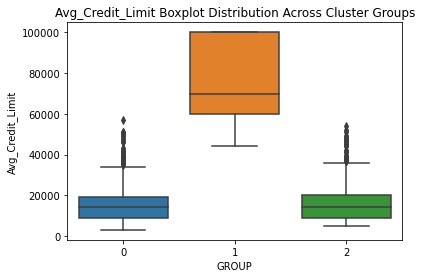

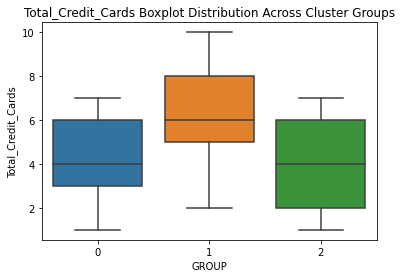

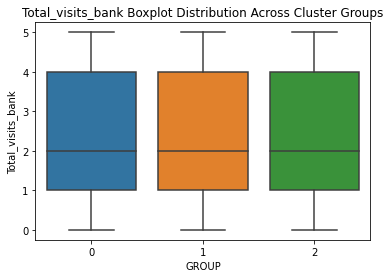

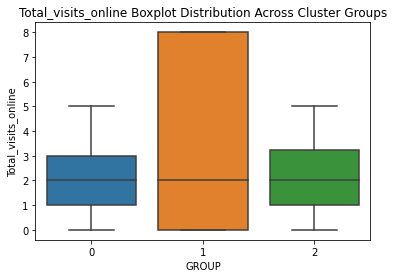

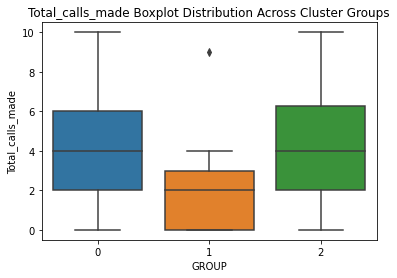

In [31]:
#Boxplot Across Cluster Groups
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds['GROUP'], cc_ds[column]).set_title(column + ' Boxplot Distribution Across Cluster Groups')
    
#sns.boxplot(cc_ds['GROUP'], cc_ds['Avg_Credit_Limit']).set_title(' Boxplot Distribution Across Target')

In [32]:
cc_ds_cluster_kmeans = cc_ds.groupby(['GROUP'])
cc_ds_cluster_kmeans.mean()
cc_ds_cluster_kmeans.std()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,264.563433,33075.16791,17369.402985,4.305970,2.429104,2.111940,4.026119
1,526.725000,58942.32500,73987.500000,6.468750,2.418750,3.118750,1.775000
2,271.340517,78010.50000,18155.172414,3.952586,2.362069,2.150862,4.318966


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,158.464943,13114.476591,11593.687599,1.816395,1.634888,1.608314,2.894407
1,118.077416,24206.819022,18454.427125,1.971246,1.584008,3.310688,1.470678
2,172.812739,13091.196164,12157.767687,2.002681,1.666562,1.595068,3.035430


Cluster 2 is composed of mostly customers with highest average credit limit and total credit cards based on the boxplot distributions. Also, they have a wide distribution of total visits online but least calls made. 
Cluster 0 and 1 are pretty similar and might as well be combined but Cluster 1 can be thought as the middle tier where customers in this segment has higher total credit cards but lesser average credit limit than Cluster 0.

#### Hierarchical Clustering

Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [33]:
from sklearn.cluster import AgglomerativeClustering 

In [34]:
#Hierarchical clustering with different linkages
model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model_4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='single')

In [35]:
#Fit these clusters to the scaled dataset
model_1.fit(cc_ds_z)
model_2.fit(cc_ds_z)
model_3.fit(cc_ds_z)
model_4.fit(cc_ds_z)

AgglomerativeClustering(linkage='average', n_clusters=3)

AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(linkage='complete', n_clusters=3)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [36]:
#Get cluster labels on each
cc_ds['labels_avg'] = model_1.labels_
cc_ds['labels_wrd'] = model_2.labels_
cc_ds['labels_cmp'] = model_3.labels_
cc_ds['labels_sgl'] = model_4.labels_

cc_ds.head(10)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels_avg,labels_wrd,labels_cmp,labels_sgl
0,1,87073,100000,2,1,1,0,1,2,0,0,0
1,2,38414,50000,3,0,8,9,1,0,1,2,2
2,3,17341,50000,7,1,3,4,0,0,0,0,0
3,4,40496,30000,5,1,1,4,0,0,0,0,0
4,5,47437,100000,6,0,8,3,1,1,2,1,1
5,6,58634,20000,3,0,1,8,2,0,1,2,0
6,7,48370,100000,5,0,8,2,1,1,2,1,1
7,8,37376,15000,3,0,1,1,0,0,1,0,0
8,9,82490,5000,2,0,2,2,2,0,1,0,0
9,10,44770,3000,4,0,1,7,0,0,1,2,0


In [37]:
#Mean of each variables within clusters using Average linkage
cc_ds_cluster_1 = cc_ds.groupby(['labels_avg'])
cc_ds_cluster_1.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels_wrd,labels_cmp,labels_sgl
labels_avg,,,,,,,,,,,
0,307.988506,54960.331691,25725.779967,4.37931,2.553366,1.924466,3.794745,0.940887,0.366174,0.676519,0.003284
1,611.280000,56708.760000,98760.000000,8.74000,0.600000,7.820000,1.080000,1.000000,2.000000,1.000000,1.000000
2,1.000000,87073.000000,100000.000000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [38]:
#Mean of each variables within clusters using Ward linkage
cc_ds_cluster_2 = cc_ds.groupby(['labels_wrd'])
cc_ds_cluster_2.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels_avg,labels_cmp,labels_sgl
labels_wrd,,,,,,,,,,,
0,417.260982,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168,0.912145,0.005168,0.000000,0.000000
1,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.551570,6.883408,0.991031,0.000000,1.847534,0.008969
2,611.280000,56708.760000,98760.000000,8.740000,0.600000,7.820000,1.080000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Mean of each variables within clusters using Complete linkage
cc_ds_cluster_3 = cc_ds.groupby(['labels_cmp'])
cc_ds_cluster_3.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels_avg,labels_wrd,labels_sgl
labels_cmp,,,,,,,,,,,
0,403.586634,55250.019802,32683.168317,5.344059,3.373762,1.034653,2.091584,0.938119,0.00495,0.042079,0.000000
1,611.280000,56708.760000,98760.000000,8.740000,0.600000,7.820000,1.080000,1.000000,1.00000,2.000000,1.000000
2,119.014563,54548.092233,12441.747573,2.475728,0.936893,3.665049,7.116505,0.946602,0.00000,1.000000,0.009709


In [40]:
#Mean of each variables within clusters using Single linkage
cc_ds_cluster_4 = cc_ds.groupby(['labels_sgl'])
cc_ds_cluster_4.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels_avg,labels_wrd,labels_cmp
labels_sgl,,,,,,,,,,,
0,307.986864,55040.231527,25807.881773,4.377668,2.555008,1.912972,3.779967,0.940887,0.003284,0.364532,0.673235
1,611.280000,56708.760000,98760.000000,8.740000,0.600000,7.820000,1.080000,1.000000,1.000000,2.000000,1.000000
2,2.000000,38414.000000,50000.000000,3.000000,0.000000,8.000000,9.000000,1.000000,0.000000,1.000000,2.000000


In [41]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [42]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
M1 = linkage(cc_ds_z, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(M1 , pdist(cc_ds_z))

c_avg

0.8889258387502743

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram - Average')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [185.0, 185.0, 210.0, 210.0],
  [151.25, 151.25, 197.5, 197.5],
  [97.5, 97.5, 174.375, 174.375],
  [65.0, 65.0, 135.9375, 135.9375],
  [42.5, 42.5, 100.46875, 100.46875],
  [245.0, 245.0, 255.0, 255.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [250.0, 250.0, 273.75, 273.75],
  [235.0, 235.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [248.4375, 248.4375, 313.75, 313.75]

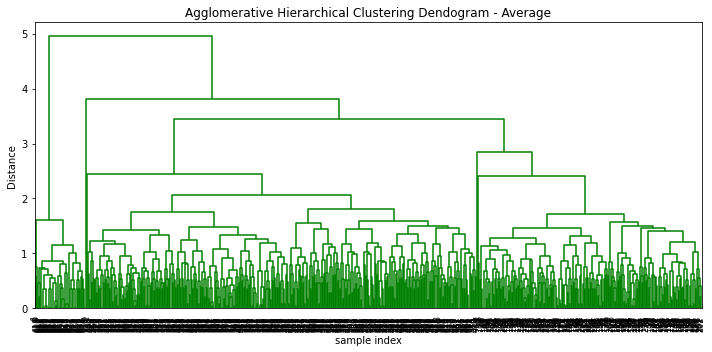

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Average')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(M1, leaf_rotation=90.,color_threshold = 90, leaf_font_size=8. )
plt.tight_layout()

In [44]:
M2 = linkage(cc_ds_z, metric='euclidean', method='ward')
c_wrd, coph_dists_wrd = cophenet(M2 , pdist(cc_ds_z))

c_wrd

0.7701478928985553

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram - Ward')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [95.0, 95.0, 113.75, 113.75],
  [72.5, 72.5, 104.375, 104.375],
  [21.875, 21.875, 88.4375, 88.4375],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0,

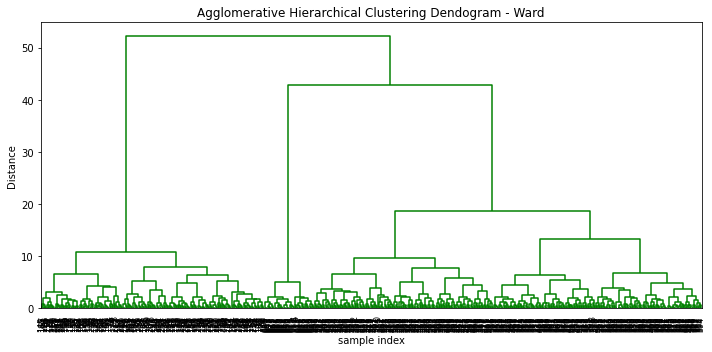

In [45]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(M2, leaf_rotation=90.,color_threshold = 90, leaf_font_size=8. )
plt.tight_layout()

In [46]:
M3 = linkage(cc_ds_z, metric='euclidean', method='complete')
c_cmp, coph_dists_wrd = cophenet(M3, pdist(cc_ds_z))

c_cmp

0.8341674150360523

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram - Complete')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [32.5, 32.5, 78.125, 78.125],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [132.5, 132.5, 162.5, 162.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [147.5, 147.5, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [275.0, 275.0, 300.0, 300.0],
  [265.0, 265.0, 287.5, 287.5],
  [236.25, 236.25, 276.25, 276.25],
  [170.0, 170.0, 256.25, 256.25],
  [55.3125, 55.3125, 213.125, 213.125],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 35

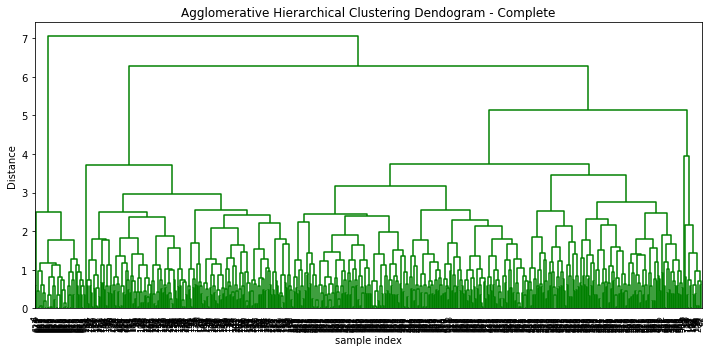

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(M3, leaf_rotation=90.,color_threshold = 90, leaf_font_size=8. )
plt.tight_layout()

In [48]:
M4 = linkage(cc_ds_z, metric='euclidean', method='single')
c_sgl, coph_dists_wrd = cophenet(M4, pdist(cc_ds_z))

c_sgl

0.6498586467714482

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram - Single')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [35.0, 35.0, 67.5, 67.5],
  [20.0, 20.0, 51.25, 51.25],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [120.0, 120.0, 151.25, 151.25],
  [105.0, 105.0, 135.625, 135.625],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [212.5, 212.5, 261.25, 261.25],
  [195.0, 195.0, 236.875, 236.875],
  [185.0, 185.0, 215.9375, 215.9375],
  [120.3125, 120.3125, 200.46875, 200.46875],
  [35.625, 35.625, 160.390625, 160.390625],
  [5.0, 5.0, 98.0078125, 98.0078125],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 

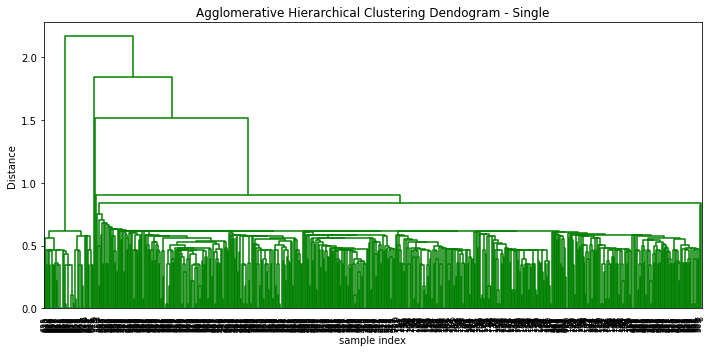

In [49]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Single')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(M4, leaf_rotation=90.,color_threshold = 90, leaf_font_size=8. )
plt.tight_layout()

* By using the cophenetic coeff, hierarchical clustering using average linkage gives us the best segmentation as value is closest to 1, followed by the complete linkage and the least is via single linkage.
* Looking at the dendograms, we have the least distance of convergence via average linkage and can produced meaningful clusters by such method.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution Across Cluster Groups')

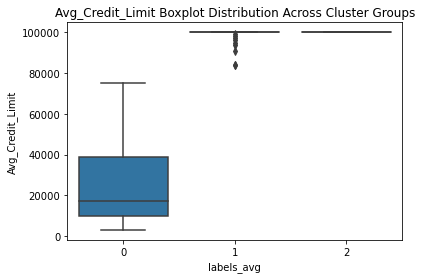

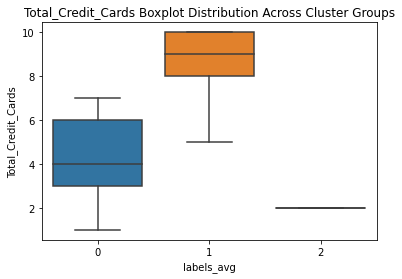

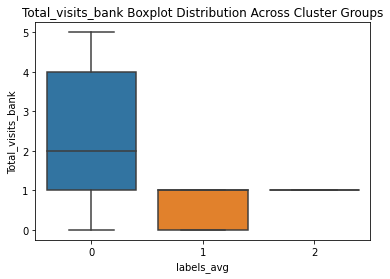

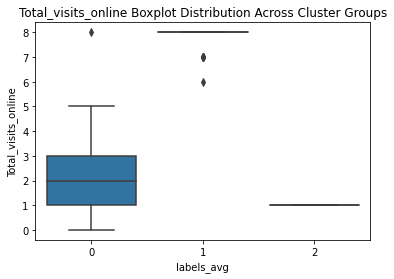

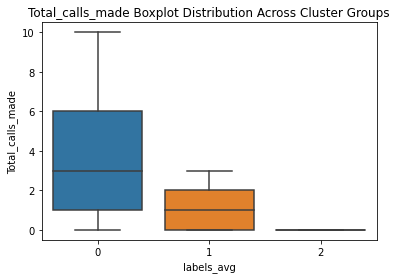

In [50]:
#Boxplot of clusters using Average linkage
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds['labels_avg'], cc_ds[column]).set_title(column + ' Boxplot Distribution Across Cluster Groups')
    

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution Across Cluster Groups')

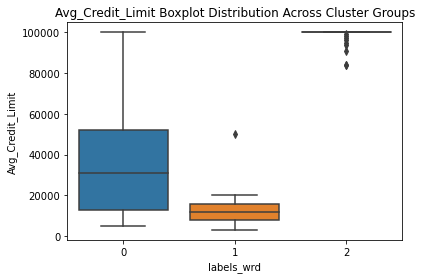

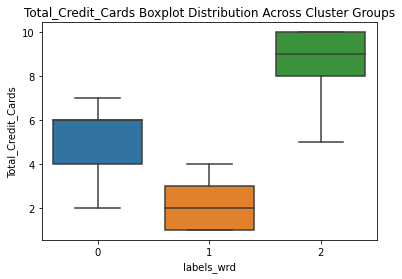

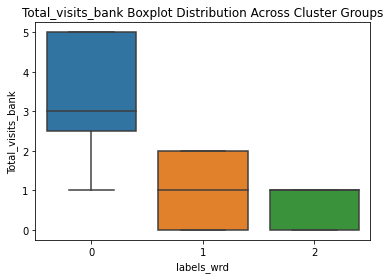

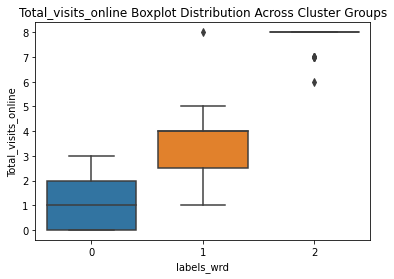

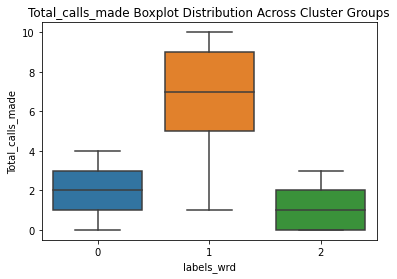

In [51]:
#Boxplot of clusters using Ward linkage
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds['labels_wrd'], cc_ds[column]).set_title(column + ' Boxplot Distribution Across Cluster Groups')
    

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution Across Cluster Groups')

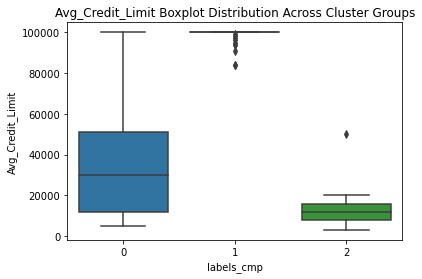

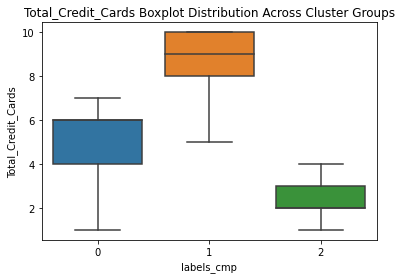

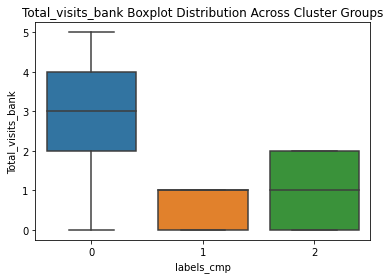

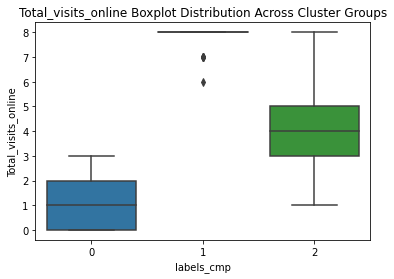

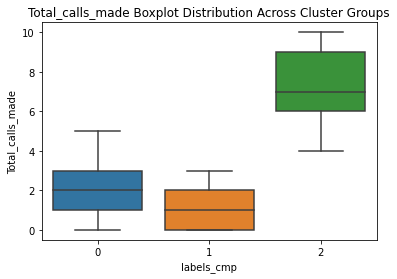

In [52]:
#Boxplot of clusters using Complete linkage
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds['labels_cmp'], cc_ds[column]).set_title(column + ' Boxplot Distribution Across Cluster Groups')
    

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Avg_Credit_Limit Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_Credit_Cards Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_bank Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_visits_online Boxplot Distribution Across Cluster Groups')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Total_calls_made Boxplot Distribution Across Cluster Groups')

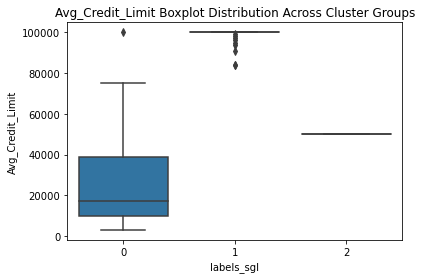

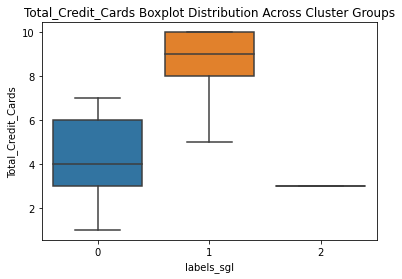

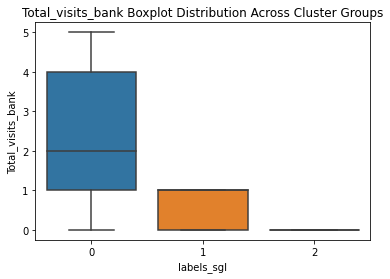

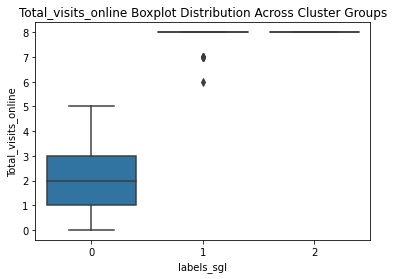

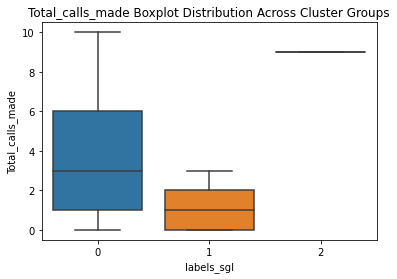

In [53]:
#Boxplot of clusters using Complete linkage
for column in columns:
    plt.figure()  
    sns.boxplot(cc_ds['labels_sgl'], cc_ds[column]).set_title(column + ' Boxplot Distribution Across Cluster Groups')
    

By using the best linkage (Average), we produced 3 segments. Cluster 0 has the lowest average credit and the most total bank, online  visits and calls made dist among the clusters. Cluster 2 has the highest avg credit limit but the lowest number of credit cards and lowest bank visits, calls, online visits on the average. Cluster 1 is the middle tier but highest total credit cards and visits online on the average.

##### Silhoutte Score for Different Methods

In [55]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

clusters_avg = fcluster(M1, 3, criterion='distance')
clusters_wrd = fcluster(M2, 15, criterion='distance')
clusters_cmp = fcluster(M3, 5, criterion='distance')
clusters_sgl = fcluster(M4, 1.75, criterion='distance')

In [56]:
# Calculate Avg Silhoutte Score

#Hierarchical Clustering on different Linkage
silhouette_score(cc_ds_z,clusters_avg)
silhouette_score(cc_ds_z,clusters_wrd)
silhouette_score(cc_ds_z,clusters_cmp)
silhouette_score(cc_ds_z,clusters_sgl)

#KMeans Clustering
silhouette_score(cc_ds_z, pred_kmeans)


0.48000757963956736

0.36215506690326704

0.37004011570272705

0.34298963368319596

0.5159967513901017

##### Compare K-means clusters with Hierarchical clusters

Silhoutte score is better when closer to 1 and worse when closer to -1. From this, we can say that the Average Linkage is the best among the hierarchical clustering methods. However, K means has the highest silhoutte score and is nearest to 1 in all methods, so we say that K means assigned the observations to clusters of its similar characteristics within and produced different heterogenous clusters more successfully than hierarchical clustering does.Though, difference is very minimal.

##### Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions

From the result of the KMeans clustering, we produced 3 different clusters. Cluster 2 is composed of mostly customers with highest average credit limit and total number credit cards on the average. Also, Cluster 2 customers have the least calls made but the highest online visits done on the average. Cluster 0 customers have the least number of credit cards but the most number of calls made done on the average. Cluster 1 can be thought as the middle tier where customers in this segment has higher total credit cards but lesser average credit limit , online visits, calls made than Cluster 0.

* How many different segments of customers are there?

There are 3 segments/clusters of customers are identified.

* How are these segments different from each other? 

As mentioned above, Cluster 2 is composed of those customers with highest average credit limit and total number of cards but also the least call made but highest online visits done. Cluster 0 customers have the least number of credit cards but the most number of calls made done on the average. Cluster 1 can be thought as the middle tier where customers in this segment has higher total credit cards but lesser average credit limit , online visits, calls made than Cluster 0.

* What are your recommendations to the bank on how to better market to and service these customers?

Since Cluster 0 and 1 contains customers with least number of credit cards or average credit limit and can be assumed that they're the less spenders, bank can focus on these customers to offer more products via  they can more focus on these customers to offer products and improve their phone and bank visit experiences. Along with, for Cluster 2 might be thought of the highest spending group since these are customers with highest credit limit and number of credit cards, they can produce campaigns that are available online to upsell their spending as these customers are likely to visit online pages to inquire bank services or products. 